# Summer Analytics 2020 Capstone Project

## Predicting Employee Attrition in Dawn of Recession

## Overview

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

### Aim of The Competition

To predict Employee Attrition by the given data about his/her past history.

### Acknowledgements
We thank IBM for providing us with the dataset.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

### Importing training and testing datasets 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

There are 27 features in the datasets with 1628 entries in training data and 470 entries in testing data 

##### There are no null-values

In [3]:
train.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [4]:
test.describe()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,235.500000,37.010638,9.293617,2.914894,1033.929787,2.708511,2.736170,2.693617,6584.874468,2.670213,...,3.155319,0.800000,11.387234,2.710638,7.070213,4.238298,2.263830,4.261702,3.051064,1.0
std,135.821574,9.166425,8.084506,1.016491,593.994868,1.089850,0.729057,1.138473,4758.485182,2.516421,...,0.362595,0.855435,7.817961,1.261744,5.900505,3.462042,3.272058,3.501693,1.413289,0.0
min,1.000000,18.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1091.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,118.250000,31.000000,2.000000,2.000000,491.500000,2.000000,2.000000,2.000000,2964.750000,1.000000,...,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.0
50%,235.500000,35.000000,7.000000,3.000000,1042.000000,3.000000,3.000000,3.000000,5038.000000,1.000000,...,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.0
75%,352.750000,43.000000,15.000000,4.000000,1537.750000,4.000000,3.000000,4.000000,8362.250000,4.000000,...,3.000000,1.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000,4.000000,1.0
max,470.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,4.000000,19943.000000,9.000000,...,4.000000,3.000000,40.000000,6.000000,40.000000,17.000000,15.000000,17.000000,5.000000,1.0


### There are some things we can point out after analysing the data :-
The behaviour columns has a single entry 1 in all its rows in both training and testing datasets. Therefore, its of no use to us as it provides no information, so we will drop it.

In [5]:
train.drop('Behaviour',axis=1,inplace=True)
test.drop('Behaviour',axis=1,inplace=True)

### Lets look the datasets for duplicates.

In [6]:
print("Number of duplicates in training data is ",train.drop('Id',axis=1).duplicated().sum()," that is about ",train.drop('Id',axis=1).duplicated().sum()/len(train)*100)
print("Number of duplicates in testing data is ",test.duplicated().sum())

Number of duplicates in training data is  628  that is about  38.57493857493858
Number of duplicates in testing data is  0


Id column signifies only the sequence in which the employees are arranged and does not have any other correlation with the Attrition column, even if there is any correlation in the training dataset that is just due to the specific arrangements in the data, which would cause overfitting of the model. To avoid this its better to drop the Id column as it will also help in recognizing the 628 duplicated columns that we found in the training dataset. Also, its important to remove these dupicate columns as the model might overfit to the duplicated data.

In [7]:
train_1 = train.drop('Id',axis=1)
test_1 = test.drop('Id',axis=1)
train_1 = train_1.drop_duplicates()

##### It is very important to do the exact same transformation on both the training and the testing datasets.

In [8]:
train_1.shape

(1000, 27)

## EDA :- Analysing data with plots to undersand data in a better way

### Features are divided into different types :-
#### (1) Categorical Features :
        - Nominal data
        - Ordinal data
#### (2) Numerical Features :
        - Continuous data
        - Discrete data

### Looking at Nominal data distribution and its relation with the Attrition

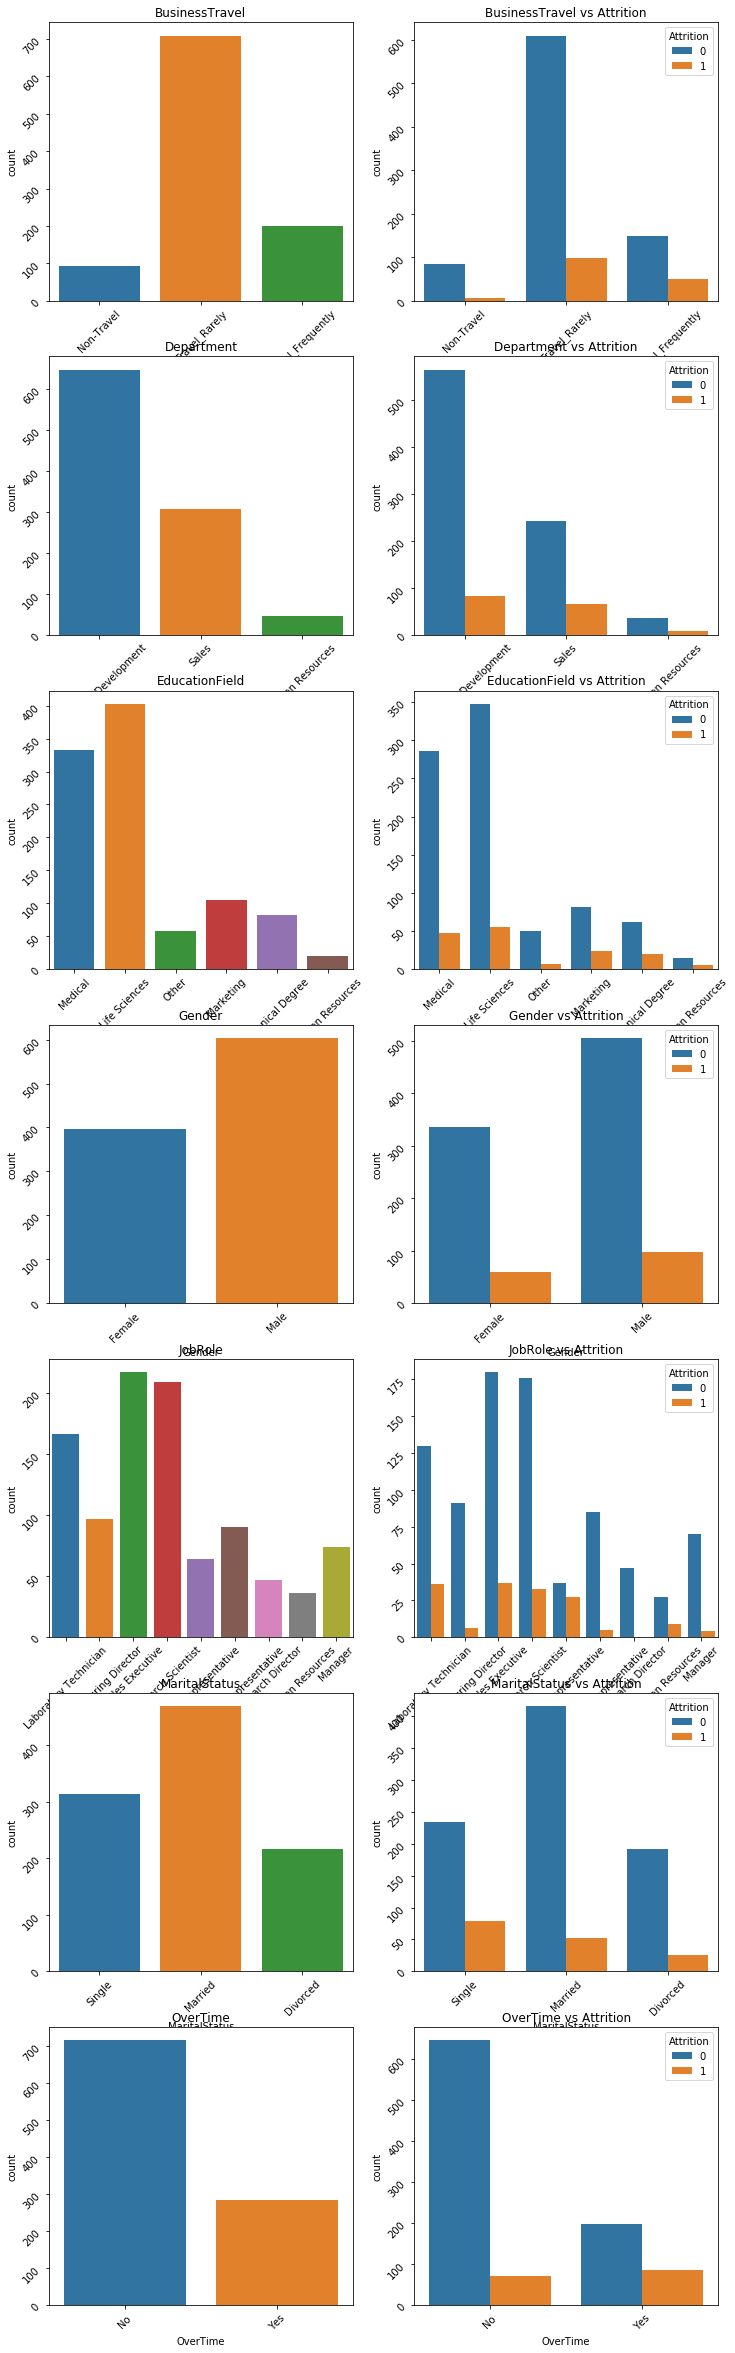

In [9]:
df_cat = train_1.loc[:,list(train_1.dtypes[train_1.dtypes=='O'].index)]
fig, ax = plt.subplots(7,2,figsize=(12,42))
for i in range(0,len(df_cat.columns)):
    sns.countplot(df_cat.iloc[:,i],ax=ax[i,0])
    ax[i,0].set_title(df_cat.columns[i])
    ax[i,0].tick_params(labelrotation=45)
    sns.countplot(df_cat.iloc[:,i],ax=ax[i,1],hue=train.Attrition)
    ax[i,1].set_title(df_cat.columns[i]+" vs Attrition")
    ax[i,1].tick_params(labelrotation=45)

### Looking at Ordinal data distribution

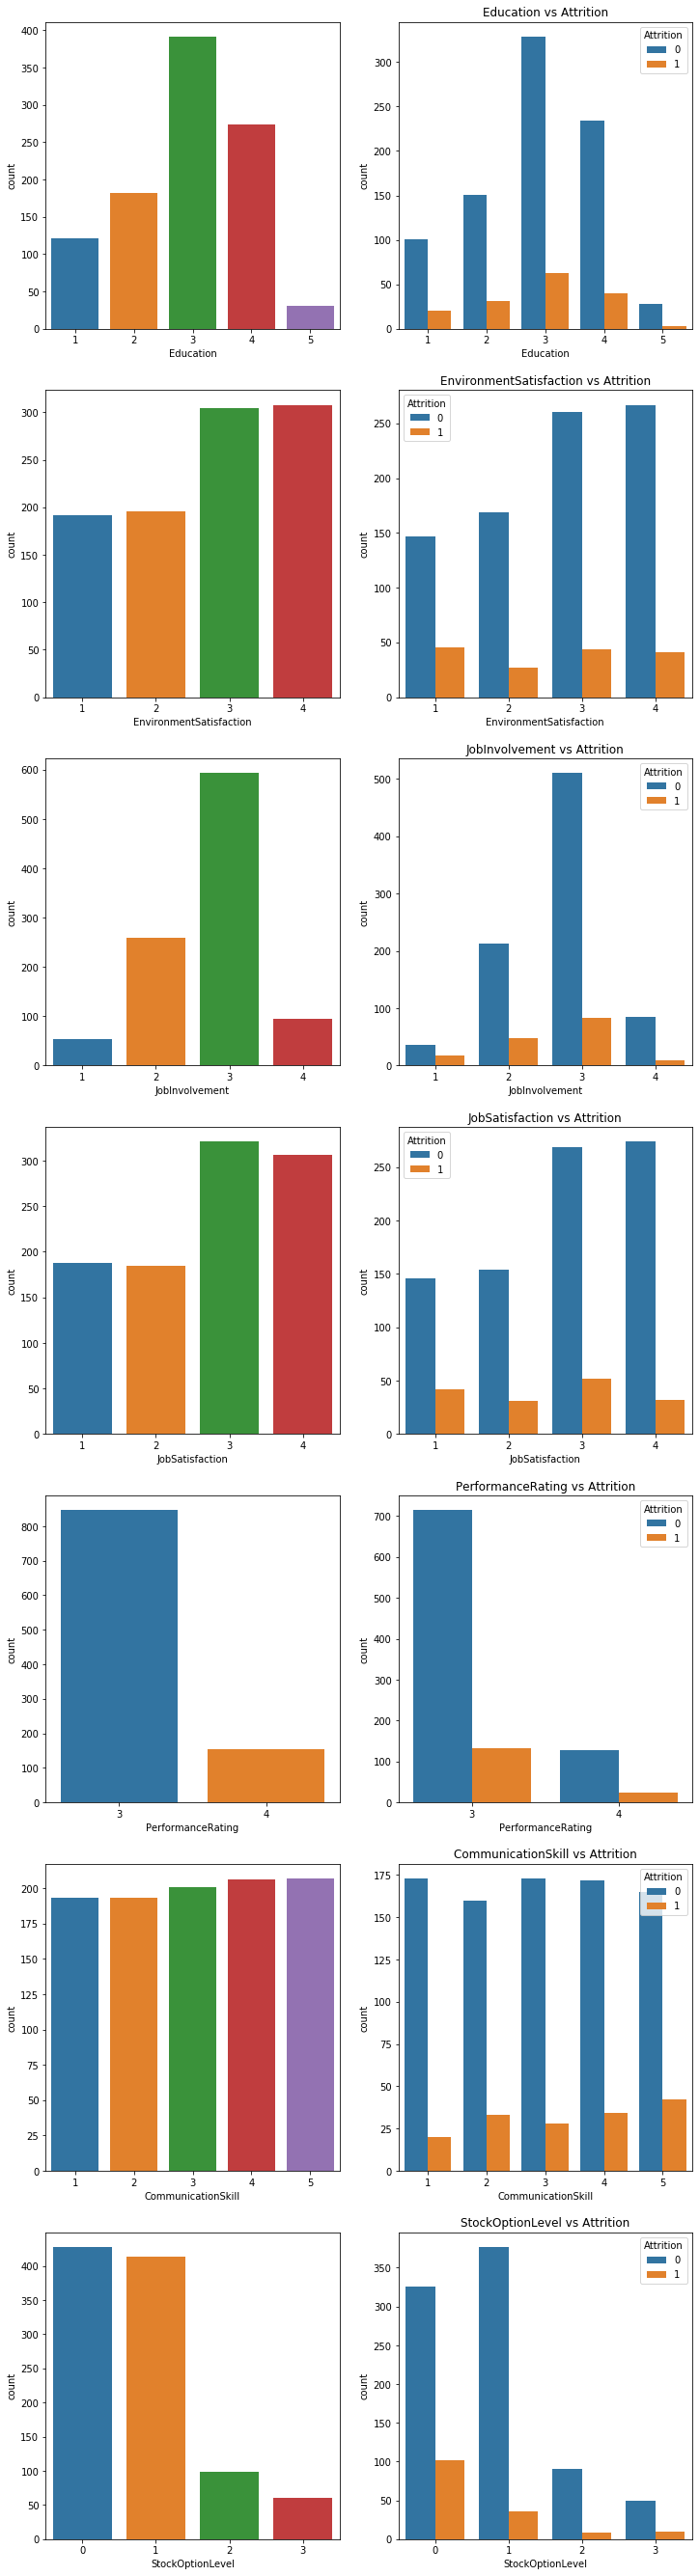

In [10]:
ord_cat = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'CommunicationSkill','StockOptionLevel']
fig , ax = plt.subplots(7,2,figsize=(12,48))
for i in range(0,len(ord_cat)):
    sns.countplot(train_1.loc[:,ord_cat[i]],ax=ax[i,0])
    sns.countplot(train_1.loc[:,ord_cat[i]],ax=ax[i,1],hue=train_1.Attrition)
    ax[i,1].set_title(ord_cat[i]+" vs Attrition")

### Looking at the Numerical data

In [11]:
ord_cat.append('Attrition')

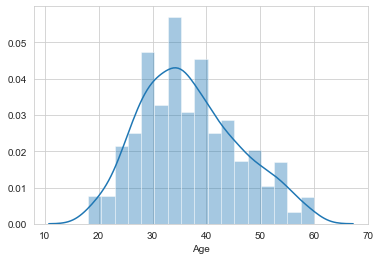

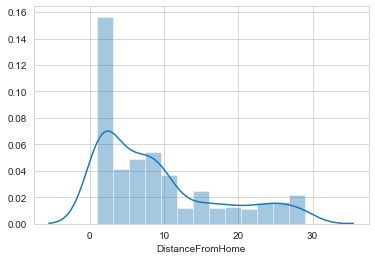

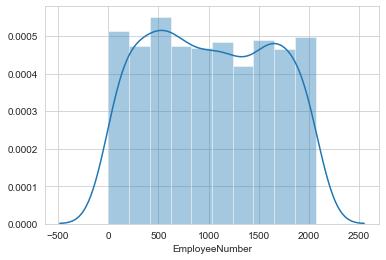

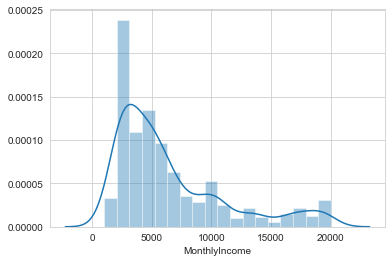

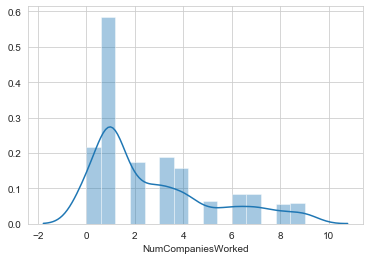

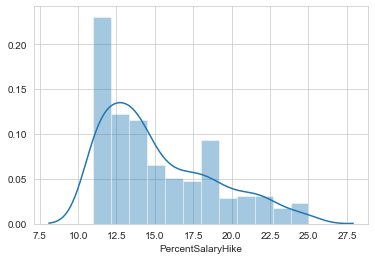

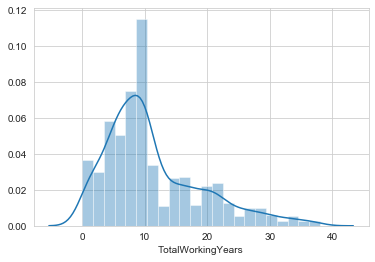

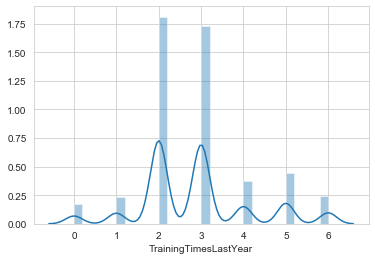

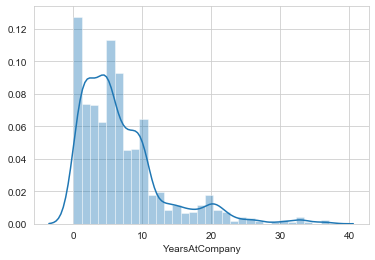

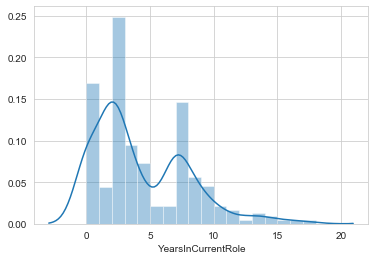

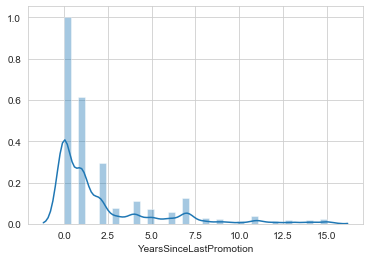

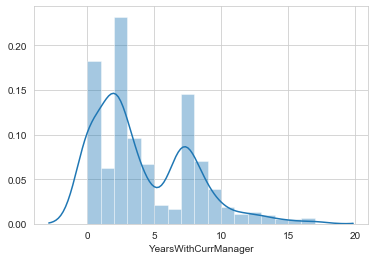

In [12]:
sns.set_style('whitegrid')
df_num_t = train_1.loc[:,list(train_1.dtypes[train_1.dtypes=='int64'].index)]
df_num = df_num_t.drop(ord_cat,axis=1)
for num in df_num:
    sns.distplot(df_num.loc[:,num])
    plt.show()

Machine Learning algorithmns generally work well on normal distribution of data. But some of the data in the above plots is left skewed, so we need to first convert them into normal distribution by applying either square-root or Logarithmic transformations.
The feature we can trasform are Age, DistanceFromHome, MonthlyIncome, PercentageSalaryHike, TotalWorkingYears, YearsAtCompany, 
YearsInCurrentRole, YearsWithCurrentManager.


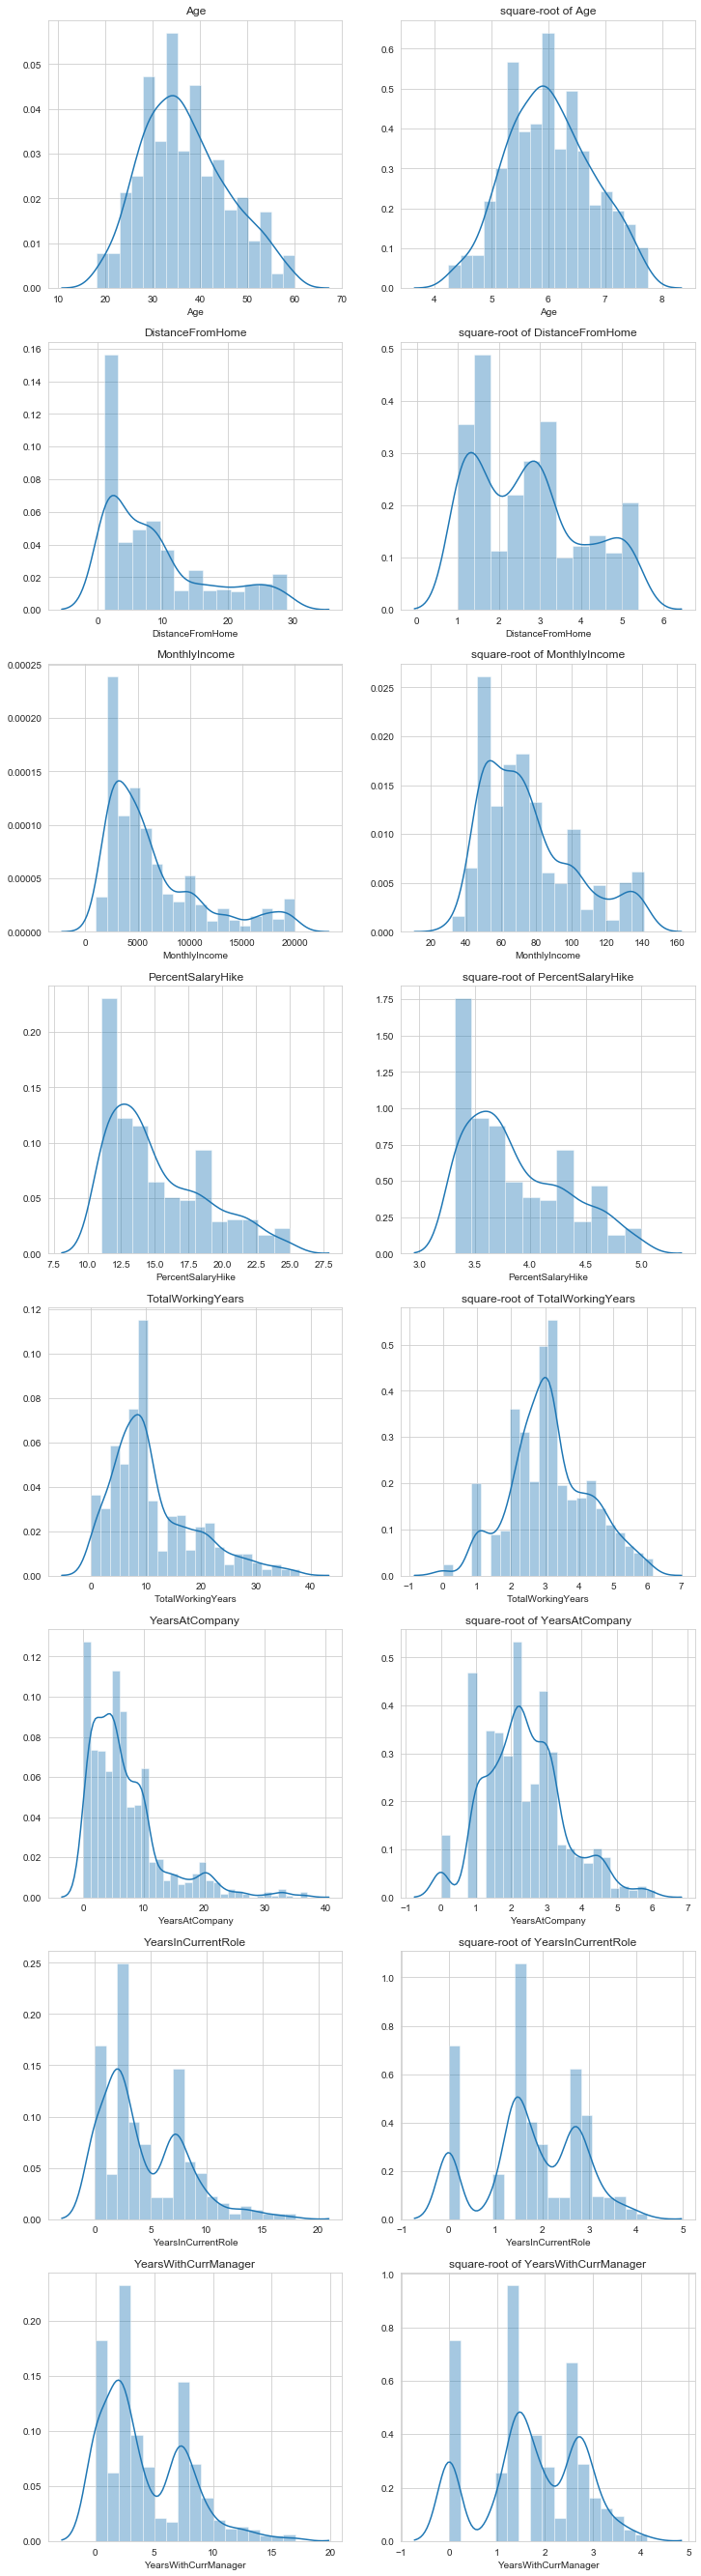

In [13]:
transform_data = ['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
fig, ax = plt.subplots(len(transform_data),2,figsize=(12,48))
i=0
for tr in transform_data:
    sns.distplot(df_num.loc[:,tr],ax=ax[i,0])
    ax[i,0].set_title(tr)
    sns.distplot(df_num.loc[:,tr].apply(np.sqrt),ax=ax[i,1])
    ax[i,1].set_title('square-root of '+tr)
    i=i+1

In almost all the numerical continuous features the square-root transformation worked well, except for MonthlyIncome and PercentSalaryHike where we will try out log transformation

Text(0.5, 1.0, 'Log of PercentSalaryHike')

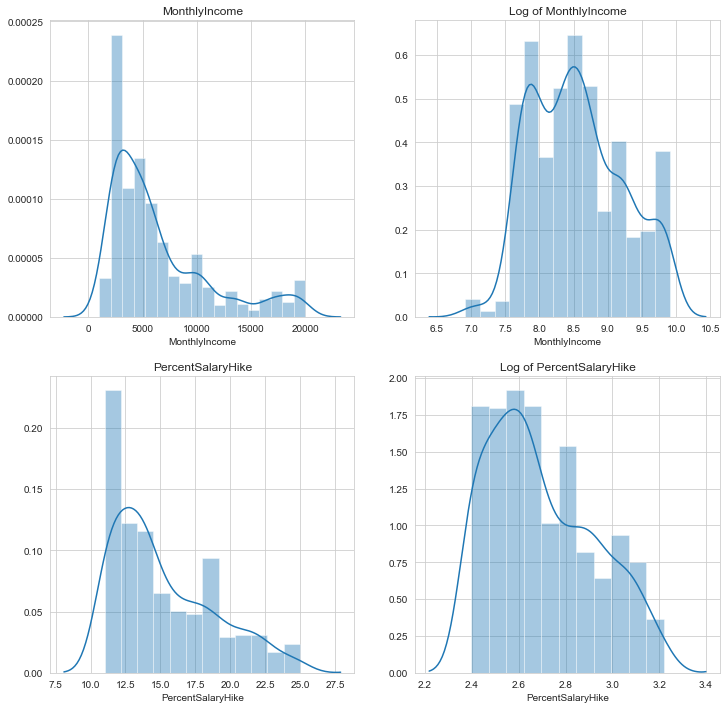

In [14]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(df_num.loc[:,'MonthlyIncome'],ax=ax[0,0])
ax[0,0].set_title('MonthlyIncome')
sns.distplot(df_num.loc[:,'MonthlyIncome'].apply(np.log),ax=ax[0,1])
ax[0,1].set_title('Log of MonthlyIncome')
sns.distplot(df_num.loc[:,'PercentSalaryHike'],ax=ax[1,0])
ax[1,0].set_title('PercentSalaryHike')
sns.distplot(df_num.loc[:,'PercentSalaryHike'].apply(np.log),ax=ax[1,1])
ax[1,1].set_title('Log of PercentSalaryHike')

Log transformation succesfully transforms the skewed data in somewhat normal form

### Transforming the Numerical data in the training set.

In [15]:
train_2 = train_1
train_2 = train_1
for tr_n in transform_data:
    if((tr_n == 'MonthlyIncome')|(tr_n == 'PercentSalaryHike')):
        train_2['log of '+tr_n]=train_2[tr_n].apply(np.log)
        train_2.drop(tr_n,axis=1,inplace=True)
    else:
        train_2['sqrt of '+tr_n]=train_2[tr_n].apply(np.sqrt)
        train_2.drop(tr_n,axis=1,inplace=True)

### Doing same transformations in the testing dataset

In [16]:
test_2 = test_1
test_2 = test_1
for tr_n in transform_data:
    if((tr_n == 'MonthlyIncome')|(tr_n == 'PercentSalaryHike')):
        test_2['log of '+tr_n]=test_2[tr_n].apply(np.log)
        test_2.drop(tr_n,axis=1,inplace=True)
    else:
        test_2['sqrt of '+tr_n]=test_2[tr_n].apply(np.sqrt)
        test_2.drop(tr_n,axis=1,inplace=True)

train_2 & test_2 are the transformations of the original data in which we have tried to handle the continuous numerical data in a way that is suitable for the Machine Learning algorithmns to train.

### Lets try to underdstand the relation between the categorical variables and attrition in a better way

In [17]:
print('The categorical data consists of nominal data which includes the following features: \n',list(df_cat.columns))
print('The ordinal data consists of the following features: \n',list(ord_cat[:-1]))

The categorical data consists of nominal data which includes the following features: 
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
The ordinal data consists of the following features: 
 ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'CommunicationSkill', 'StockOptionLevel']


In [18]:
print('Attrition column distribution is\n',train_2.Attrition.value_counts()/len(train_2)*100)

Attrition column distribution is
 0    84.3
1    15.7
Name: Attrition, dtype: float64


#### We can form an hypothesis that:
15.7 percent of the employees in the training dataset have attrition 1 and the rest 0.
While analysing other features we can say that if the attrition % for a particular attribute in the training data is more than 15.7% than the employees with this attribute are more likely to have attrition 1 than an average employee. Similar correlation could be formed with attrition percent less than 15.7.

#### BusinessTravel vs Attrition

In [19]:
train_2.groupby('BusinessTravel').Attrition.mean()

BusinessTravel
Non-Travel           0.076087
Travel_Frequently    0.256281
Travel_Rarely        0.139633
Name: Attrition, dtype: float64

Due to the variance in the attrition %, this feature looks good for including in our model.

#### Department vs Attrition

In [20]:
train_2.groupby('Department').Attrition.mean()

Department
Human Resources           0.200000
Research & Development    0.128284
Sales                     0.211039
Name: Attrition, dtype: float64

We can divide Department into 2 groups:

Group1 - Human Resources and Sales

Group2 - Research & Development

In [21]:
train_2['Department']=train_2['Department'].map({'Human Resources':'Group1','Research & Development':'Group2','Sales':'Group1'})

In [22]:
test_2['Department']=test_2['Department'].map({'Human Resources':'Group1','Research & Development':'Group2','Sales':'Group1'})

#### Education field vs Attrition

In [23]:
train_2.groupby('EducationField').Attrition.mean()

EducationField
Human Resources     0.250000
Life Sciences       0.136476
Marketing           0.219048
Medical             0.141141
Other               0.122807
Technical Degree    0.243902
Name: Attrition, dtype: float64

All the groups in education field show a differen attrition %, so better to keep them as they are 

#### Gender vs Attrition

In [24]:
train_2.groupby('Gender').Attrition.mean()

Gender
Female    0.148990
Male      0.162252
Name: Attrition, dtype: float64

#### JobRole vs Attrition

In [25]:
train_2.groupby('JobRole').Attrition.mean()

JobRole
Healthcare Representative    0.055556
Human Resources              0.250000
Laboratory Technician        0.216867
Manager                      0.054054
Manufacturing Director       0.061856
Research Director            0.000000
Research Scientist           0.157895
Sales Executive              0.170507
Sales Representative         0.421875
Name: Attrition, dtype: float64

Here all the different job roles have higher variance in attrition % and hence we will keep it as it is 

#### MaritalStatus vs Attrition

In [26]:
train_2.groupby('MaritalStatus').Attrition.mean()

MaritalStatus
Divorced    0.115207
Married     0.113006
Single      0.251592
Name: Attrition, dtype: float64

Here we notice that singles have a higher attrition rate so we will divide it into 2 groups :

Group1 - singles

Group2 - non-singles

In [27]:
train_2['MaritalStatus']=train_2['MaritalStatus'].map({'Divorced':'non-single','Married':'non-single','Single':'single'})
test_2['MaritalStatus']=test_2['MaritalStatus'].map({'Divorced':'non-single','Married':'non-single','Single':'single'})

#### OverTime vs Attrition

In [28]:
train_2.groupby('OverTime').Attrition.mean()

OverTime
No     0.099162
Yes    0.302817
Name: Attrition, dtype: float64

This seems to the most important feature so far as it has the highest variance in the attrition %

In [29]:
print('The ordinal data consists of the following features: \n',list(ord_cat[:-1]))

The ordinal data consists of the following features: 
 ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'CommunicationSkill', 'StockOptionLevel']


#### Education vs Attrition

In [30]:
train_2.groupby('Education').Attrition.mean()

Education
1    0.165289
2    0.170330
3    0.160714
4    0.145985
5    0.096774
Name: Attrition, dtype: float64

The first four Education levels have very similar attrition % so they could be formed into 1 group and education level 5 into another

In [31]:
train_2['Education']=train_2.Education.map({1:'gr1',2:'gr1',3:'gr1',4:'gr1',5:'gr2'})
test_2['Education']=test_2.Education.map({1:'gr1',2:'gr1',3:'gr1',4:'gr1',5:'gr2'})

#### EnvironmentSatisfaction vs Attrition

In [32]:
train_2.groupby('EnvironmentSatisfaction').Attrition.mean()

EnvironmentSatisfaction
1    0.234375
2    0.137755
3    0.144737
4    0.133117
Name: Attrition, dtype: float64

Here again we can divide EnvironmentSatisfaction into 2 groups:-
EnvironmentSatisfaction level 1 as low and others as high

In [33]:
train_2['EnvironmentSatisfaction']=train_2['EnvironmentSatisfaction'].map({1:'low',2:'high',3:'high',4:'high'})
test_2['EnvironmentSatisfaction']=test_2['EnvironmentSatisfaction'].map({1:'low',2:'high',3:'high',4:'high'})

#### JobInvolvement vs Attrition

In [34]:
train_2.groupby('JobInvolvement').Attrition.mean()

JobInvolvement
1    0.333333
2    0.181467
3    0.139966
4    0.095745
Name: Attrition, dtype: float64

#### JobSatisfaction vs Attrition

In [35]:
train_2.groupby('JobSatisfaction').Attrition.mean()

JobSatisfaction
1    0.223404
2    0.167568
3    0.161994
4    0.104575
Name: Attrition, dtype: float64

#### PerformanceRating vs Attrition

In [36]:
train_2.groupby('PerformanceRating').Attrition.mean()

PerformanceRating
3    0.155844
4    0.163399
Name: Attrition, dtype: float64

This feature does not differentiate between the different levels, so its not that important and we will drop it

In [37]:
train_2.drop('PerformanceRating',axis=1,inplace=True)
test_2.drop('PerformanceRating',axis=1,inplace=True)

#### CommunicationSkill vs Attrition

In [38]:
train_2.groupby('CommunicationSkill').Attrition.mean()

CommunicationSkill
1    0.103627
2    0.170984
3    0.139303
4    0.165049
5    0.202899
Name: Attrition, dtype: float64

#### StockOptionLevel vs Attrition

In [39]:
train_2.groupby('StockOptionLevel').Attrition.mean()

StockOptionLevel
0    0.238318
1    0.087167
2    0.090909
3    0.166667
Name: Attrition, dtype: float64

So, we have been through all the features and have successfully analysed them and made transformations in the features where ever suitable

Machine learning models do not accept string data so we will transform them using the dummy variables. Using dummy variables is also useful in simplyfying the data and simple models work really well on them

### Getting dummies

In [40]:
cats = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Education','EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction','CommunicationSkill','StockOptionLevel']
train_3 = pd.get_dummies(train_2,columns=cats)
test_3 = pd.get_dummies(test_2,columns=cats)

Our data is ready and should start with building models to train our data

### Model Building

#### Logistic Regression

In [41]:
cross_val_score(LogisticRegression(max_iter=2000),train_3.drop(['Attrition'],axis=1),train_3.Attrition,cv=5,scoring='roc_auc').mean()

0.8638245936497333

#### RandomForest

In [42]:
cross_val_score(RandomForestClassifier(),train_3.drop(['Attrition'],axis=1),train_3.Attrition,cv=5,scoring='roc_auc').mean()

0.8098497972509294

#### Neural Networks

In [43]:
cross_val_score(MLPClassifier(hidden_layer_sizes=(200,200),activation='logistic'),train_3.drop('Attrition',axis=1),train_3.Attrition,cv=5,scoring='roc_auc').mean()

0.8238568806865179

#### SVM Classifier

In [44]:
cross_val_score(SVC(),train_3.drop('Attrition',axis=1),train_3.Attrition,cv=5,scoring='roc_auc').mean()

0.6417471641261965

#### KNeighborsClassifier


In [45]:
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(n_neighbors=5),train_3.drop('Attrition',axis=1),train_3.Attrition,cv=5,scoring='roc_auc').mean()

0.5501801641932303

#### XGBoost Classifier

In [46]:
from xgboost import XGBClassifier

In [47]:
cross_val_score(XGBClassifier(booster='gblinear'),train_3.drop(['Attrition'],axis=1),train_3.Attrition,cv=5,scoring='roc_auc').mean()

0.8640796774307165

So far XGBoost has given the best accuracy

### Model Ensembling
Model ensembling is generally considered to be good as it helps in making the model more generalised by taking different classifiers into consideration and generally improves the score

In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
vclf = VotingClassifier(estimators=[('log',LogisticRegression(max_iter=2000)),('xg',XGBClassifier(booster='gblinear'))],voting='soft')
cross_val_score(vclf,train_3.drop('Attrition',axis=1),train_3.Attrition,cv=5,scoring='roc_auc').mean()                       

0.8640495192875776

#### Final model Selection
There are 3 models which are giving a cross validation score of about 0.864

Among these models ensembled model of logistic regression and XGBoost is selected as ensembling helps to tackle overfitting and makes the model more generalised and might work better on testing dataset

### Building the final model and submission

In [50]:
model=vclf
model.fit(train_3.drop(['Attrition'],axis=1),train_3.Attrition)
Attrition = model.predict_proba(test_3)[:,1]
sub=pd.DataFrame(zip(test.Id,Attrition),columns=['Id','Attrition']).set_index('Id')
sub.head()

,Attrition
Id,
1,0.008509
2,0.010069
3,0.093478
4,0.021176
5,0.003149
